In [1]:
from TT_utilities import Case
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
RECORD_DIRS = list(Path("./Data").glob("*p00*"))
CASES = list()
for record_dir in RECORD_DIRS:
    record_name = re.search("p[0-9]{6}", str(record_dir))[0]
    c = Case(record_dir.joinpath(record_name))
    CASES.append(c)
    print(c)

Case: p000638 - Records above 1000 samples ->
	 Record: 3033264_0005, Length:1686415, 	# of signals: 2 -> ['II', 'V']
	 Record: 3033264_0006, Length:3317, 	# of signals: 3 -> ['II', 'V', 'ABP']
	 Record: 3033264_0007, Length:1834183, 	# of signals: 3 -> ['II', 'V', 'ABP']
	 Record: 3033264_0008, Length:5137500, 	# of signals: 2 -> ['II', 'ABP']
	 Record: 3033264_0009, Length:645000, 	# of signals: 1 -> ['II']
 *  *  *  *  * End of case p000638 *  *  *  *  * 
Case: p001170 - Records above 1000 samples ->
	 Record: 3612801_0001, Length:6375, 	# of signals: 4 -> ['RESP', 'II', 'V', 'AVR']
	 Record: 3612801_0002, Length:37000, 	# of signals: 5 -> ['RESP', 'II', 'V', 'AVR', 'PLETH R']
	 Record: 3612801_0005, Length:1500, 	# of signals: 5 -> ['RESP', 'III', 'V', 'II', 'PLETH R']
	 Record: 3612801_0008, Length:2873375, 	# of signals: 5 -> ['RESP', 'II', 'V', 'AVR', 'PLETH R']
	 Record: 3612801_0011, Length:66375, 	# of signals: 5 -> ['RESP', 'II', 'V', 'AVR', 'PLETH R']
	 Record: 3612801_0013

In [3]:
def smoother(array, window=5, pad=True, repeat=1):
    """
    Regresa un vector de la misma longitud que el introducido, dependiendo
    del valor de la ventana ajusta los extremos al promedio de los valores
    que puede ocupar.
    
    ó, si pad = False
    Regresa sólo el vector promediado con los (window-1) datos en los ext-
    tremos acortados.
    
    VALOR MÍNIMO DE VENTANA ES 3
    """
    for i in range(repeat):
        serie = pd.Series(array)
        data = list(serie.rolling(window=window).mean())
        numb = sum(np.isnan(data)*1)
        if not pad:
            return data[numb:]
        lower, upper = int(np.ceil(numb/2)), int(np.floor(numb/2))
        ini = [np.mean(array[:i+upper]) for i in range(lower)]
        end = [np.mean(array[(len(array)-(lower+i)):]) for i in range(upper)]
        array = np.array(ini+data[numb:]+end)
    return array

### RR LECTURE

#### SCIPY PEAK DETECTION



In [4]:
from wfdb import gqrs_detect
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, iirnotch, filtfilt

from wfdb import processing

In [5]:
fs = CASES[0][0].fs
signal = CASES[0][0]["II"][:3000]
x_data = np.arange(len(signal))/fs
MAX_BPM = 220

Text(0.5, 1.0, 'Function: scipy.find_peaks')

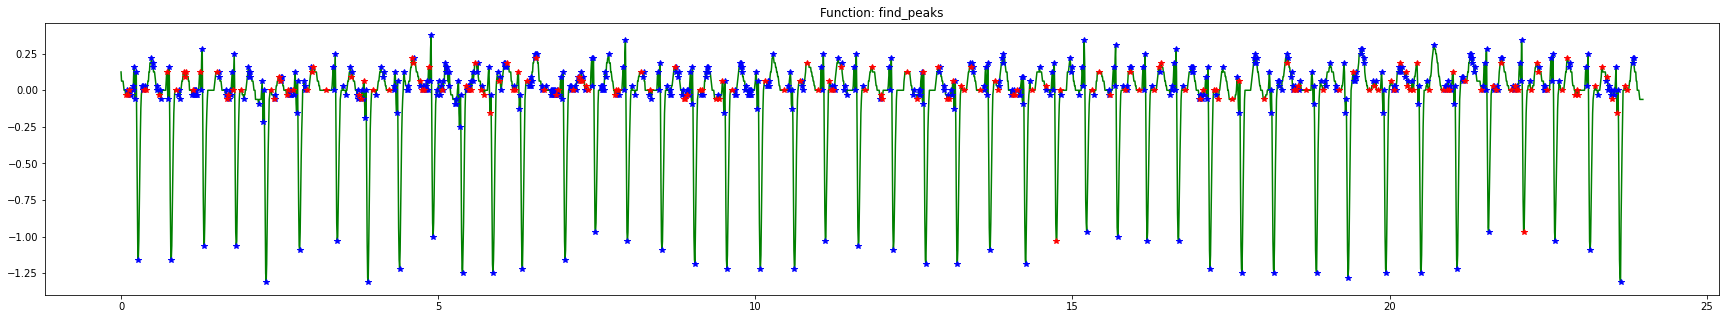

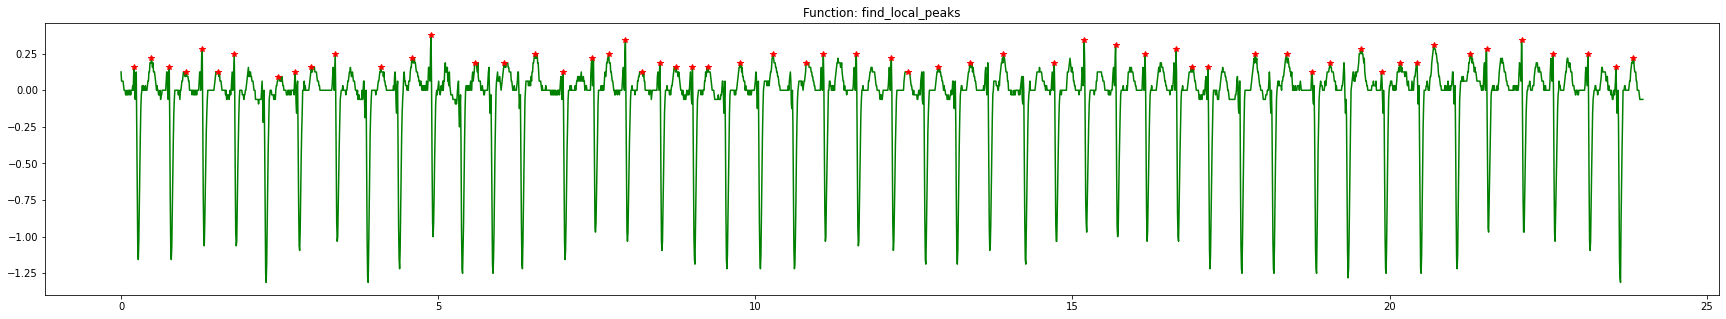

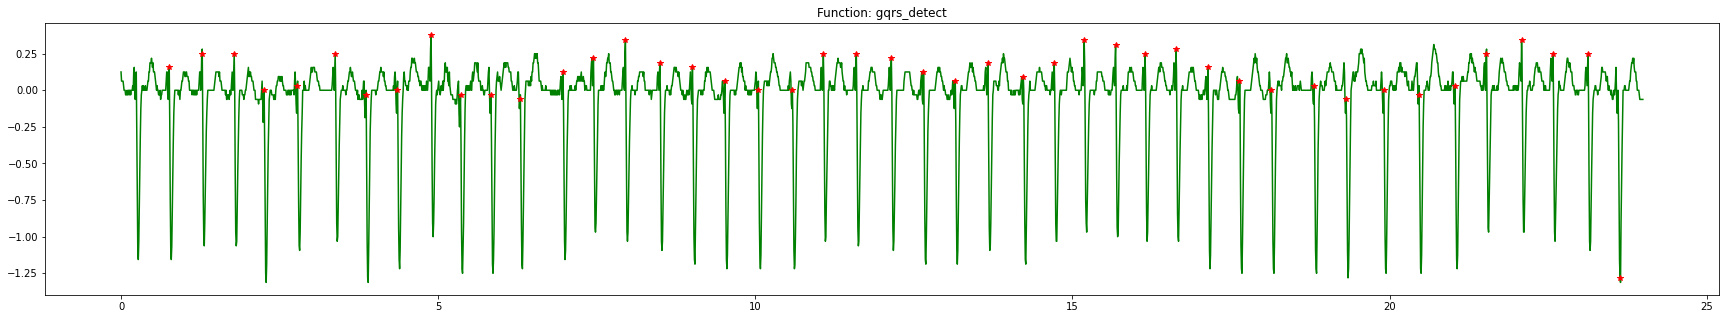

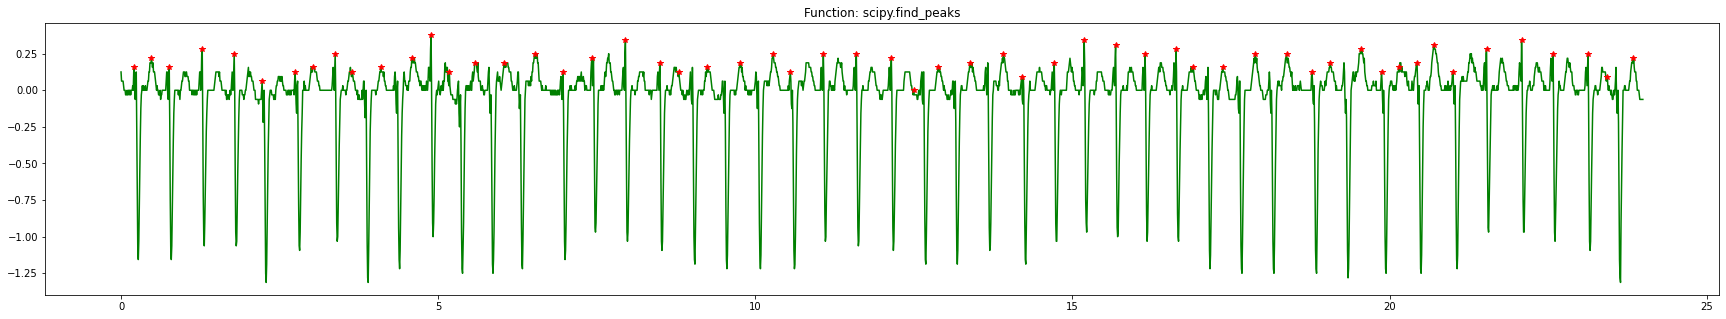

In [6]:
a, b = processing.find_peaks(signal)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*b")
plt.plot(x_data[b], signal[b], "*r")
plt.title("Function: find_peaks")

a = processing.find_local_peaks(signal, int(fs/4))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: find_local_peaks")

a = processing.gqrs_detect(signal, fs)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: gqrs_detect")

a, b = find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: scipy.find_peaks")

In [7]:
plt.figure()
for i in range(1, 6):
    a_signal = smoother(signal, window=int(((60*fs)/MAX_BPM)))


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Function: scipy.find_peaks')

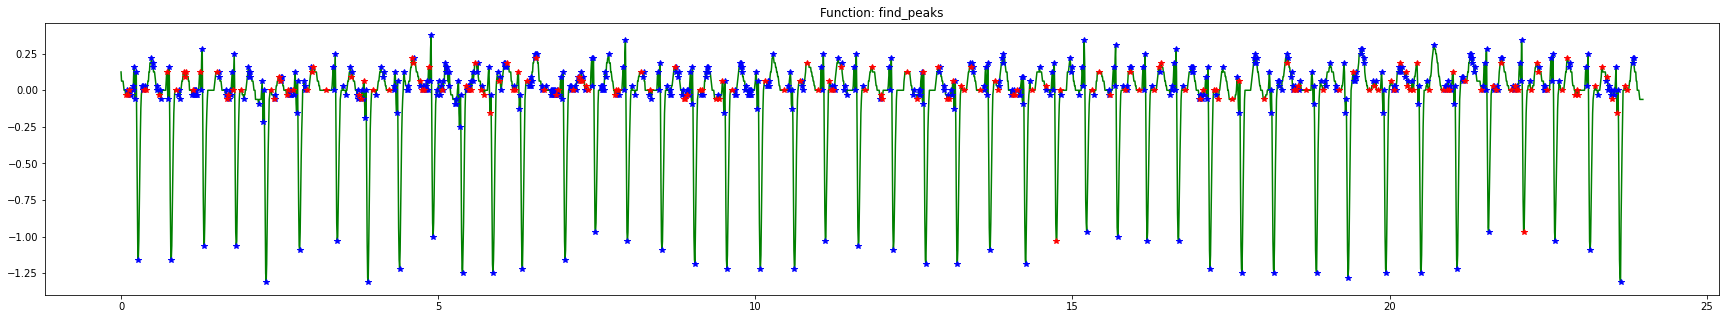

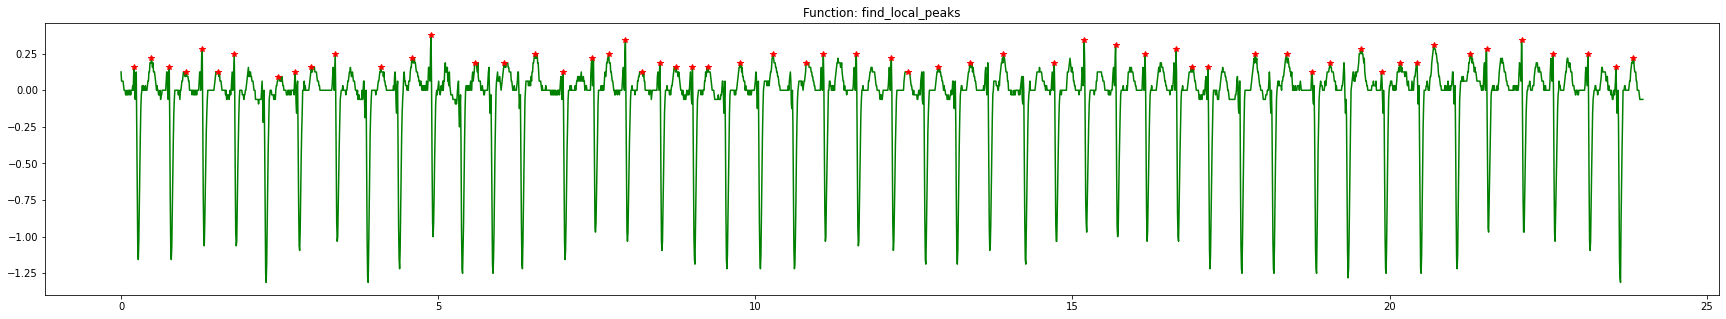

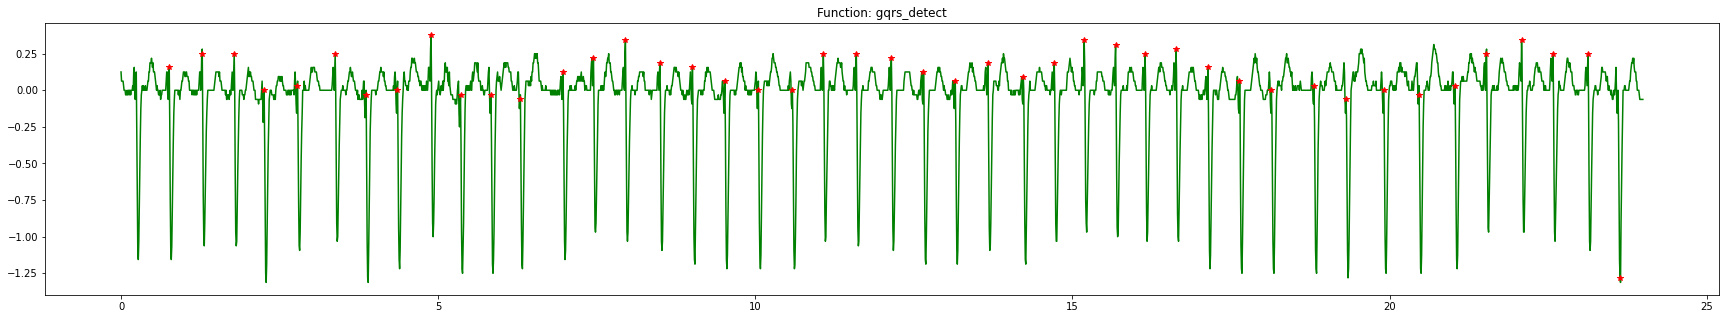

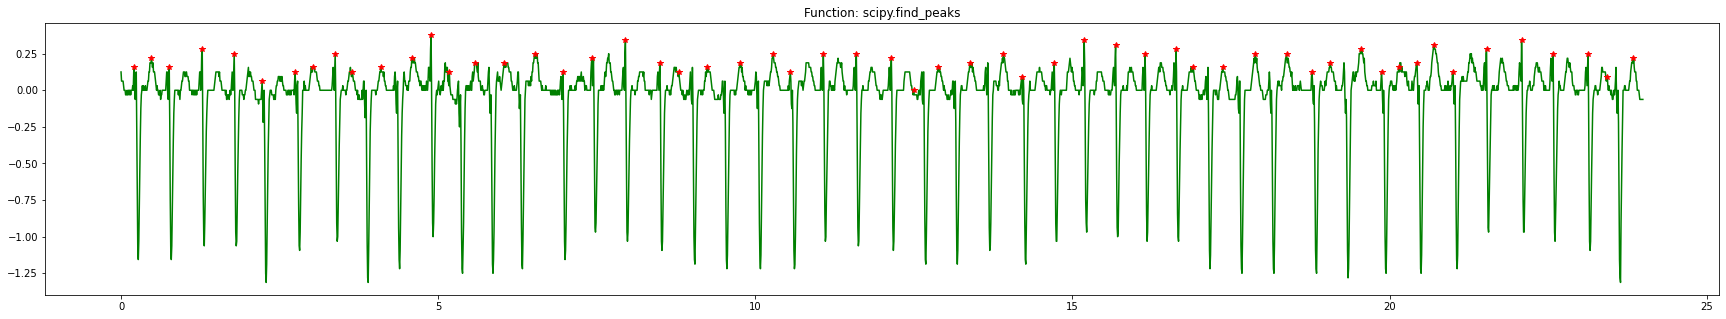

In [8]:

a, b = processing.find_peaks(signal)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*b")
plt.plot(x_data[b], signal[b], "*r")
plt.title("Function: find_peaks")

a = processing.find_local_peaks(signal, int(fs/4))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: find_local_peaks")

a = processing.gqrs_detect(signal, fs)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: gqrs_detect")

a, b = find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: scipy.find_peaks")

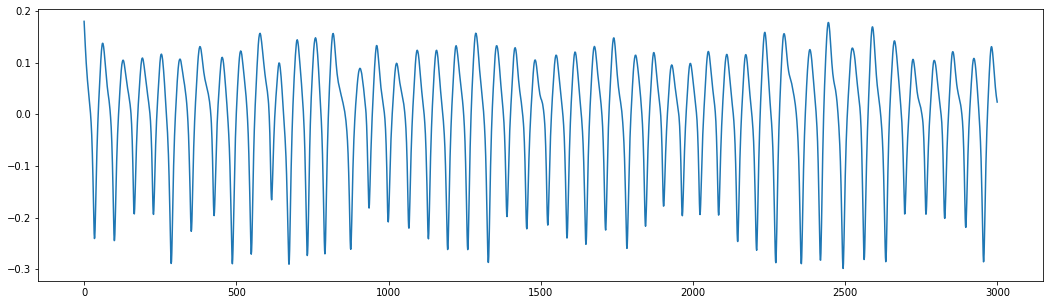

In [12]:
plt.figure(figsize=(18, 5))
plt.plot(a_signal)

Text(0.5, 1.0, 'Function: scipy.find_peaks')

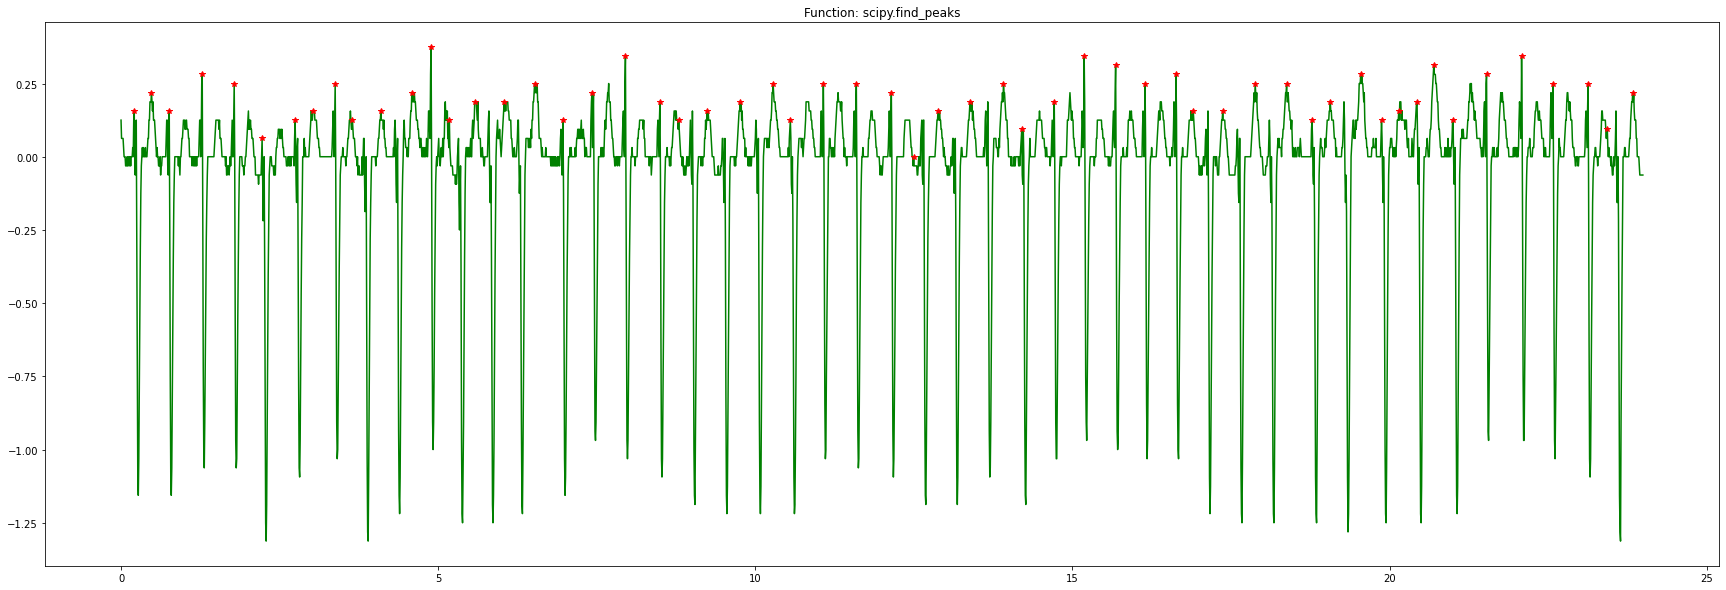

In [25]:
a, b = find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 10))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: scipy.find_peaks")

In [26]:
a

array([  26,   60,   95,  160,  223,  278,  343,  379,  422,  456,  512,
        573,  611,  647,  698,  755,  815,  871,  928,  994, 1062, 1099,
       1155, 1220, 1285, 1319, 1384, 1449, 1518, 1562, 1610, 1673, 1739,
       1775, 1839, 1898, 1960, 2018, 2079, 2113, 2171, 2235, 2297, 2347,
       2383, 2443, 2484, 2518, 2553, 2587, 2624, 2691, 2760, 2822, 2891,
       2928, 2979], dtype=int64)

In [27]:
signal

array([ 0.125 ,  0.0625,  0.0625, ..., -0.0625, -0.0625, -0.0625])

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5


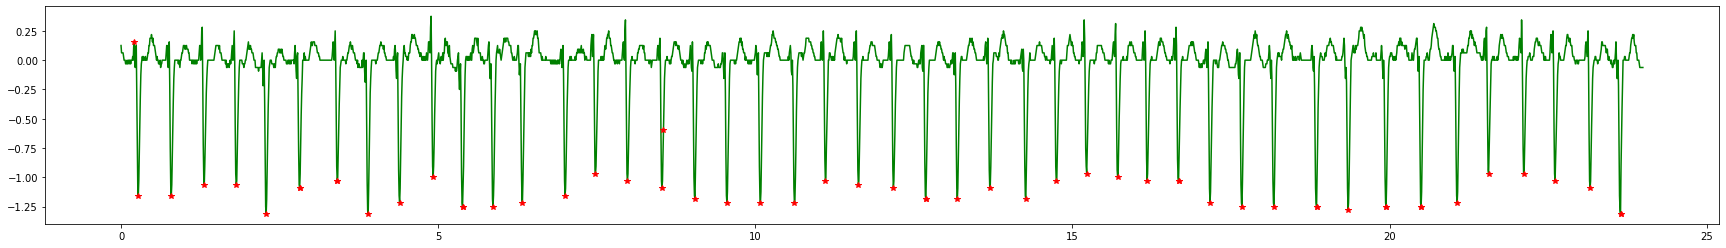

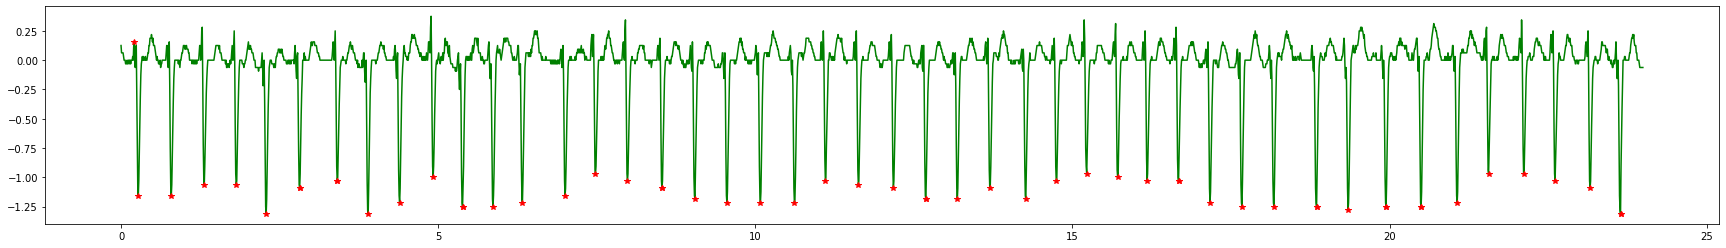

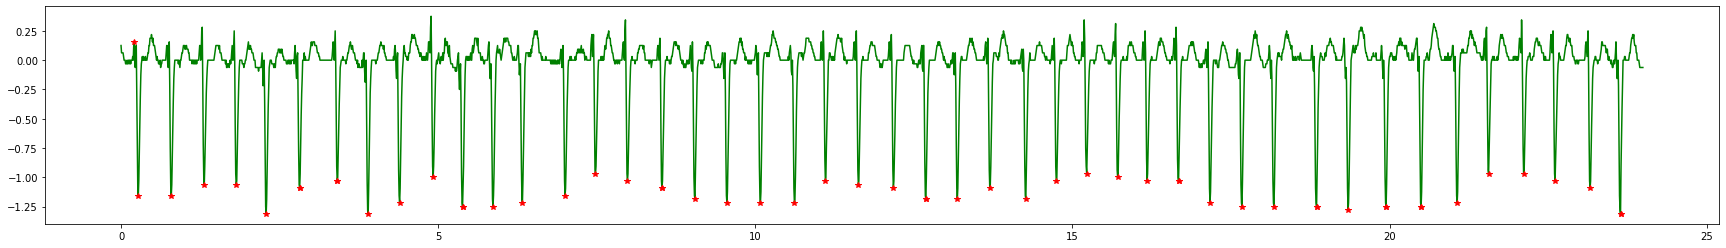

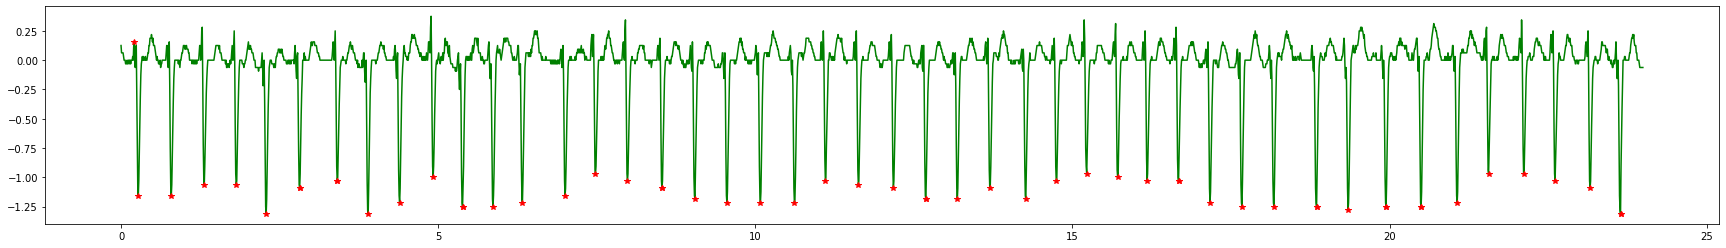

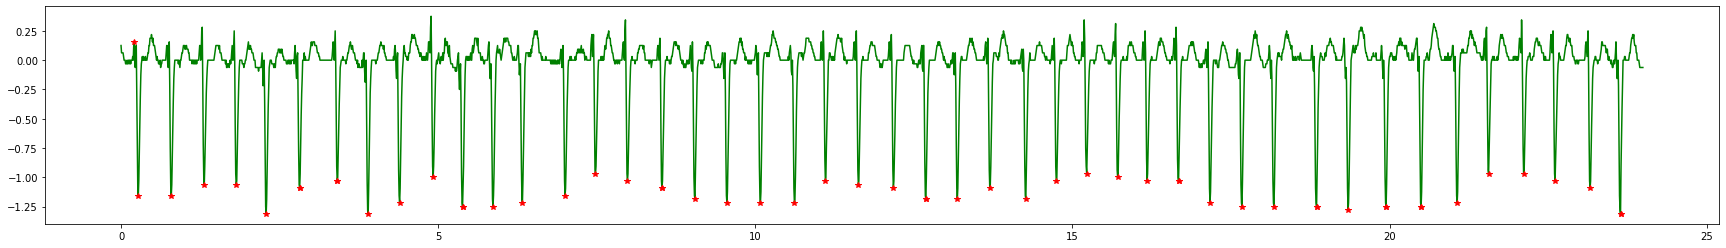

In [30]:
b = a
for i in range(5):
    print(f"Iteración {i+1}")
    b=processing.correct_peaks(signal,b,30,35,peak_dir='down')
    plt.figure(figsize=(30, 4))
    plt.plot(x_data, signal, "g")
    plt.plot(x_data[b], signal[b], "*r")